In [2]:
import json
import os
import matplotlib.pyplot as plt
import pandas as pd


In [3]:

annotation_file="new_annotations"
fp_dict = {'fp_1': [], 'fp_2': [], 'fp_3': []}

df = pd.read_json(annotation_file)
df = df[["patient_name", "flags"]]
df
    
# def create_and_plot_error_columns(annotation_file,save=False):
#     df = pd.read_json(annotation_file)
#     df = df[["patient_name", "flags"]]
#     df = df.explode('flags').reset_index(drop=True)
#     print(df)
#     exit()
#     for i in range(1, 7):
#         df["flag_{}".format(i)] = 0
#     df["no_error"] = 0

#     for i in range(len(df)):
#         error_list = df.loc[i, "flags"].split("_")
#         for j in range(1, 7):
#             if str(j) in error_list:
#                 df.loc[i, "flag_{}".format(j)] = 1
#         if df.loc[i, "flags"] == "no_error":
#             df.loc[i, "no_error"] = 1

    # error_columns = ["fp_1", "fp_2", "fp_3", "ff_1", "ff_2", "ff_3", "no_error"]
    # error_values = df[error_columns].sum()
    # if save==True:
    #     df.to_csv("errors_new.csv",index=False)
    # return df

   
# df = create_and_plot_error_columns(annotation_file, save=False)

,patient_name,flags
0,MAD_178_0,"[fp_13, ff_12_3, ff_6_3]"
1,MAD_149_0,"[fp_2, ff_5_12]"
2,MAD_31_0,[no_error]
3,MAD_176_0,[no_error]
4,MAD_182_0,"[fp_2, ff_4_1]"
...,...,...
63,MAD_161_0,"[fp_23, ff_4_13]"
64,MAD_19_0,"[fp_3, ff_14_13, ff_3_3]"
65,MAD_75_0,"[ff_12_3, ff_6_3]"
66,MAD_132_0,[no_error]


In [1]:
import pandas as pd

# Assuming 'df' is your original DataFrame with a 'flags' column
# For example, df = pd.read_csv('your_dataset.csv')

# Initialize an empty DataFrame with the desired columns
result_df = pd.DataFrame(columns=['fp_1', 'fp_2', 'fp_3', 'ff_1', 'ff_2', 'ff_3'])

# Iterate through each row of the original DataFrame
for index, row in df.iterrows():
    # Initialize a dictionary to store the counts for each flag
    flag_counts = {'fp_1': 0, 'fp_2': 0, 'fp_3': 0, 'ff_1': 0, 'ff_2': 0, 'ff_3': 0}

    # Iterate through each flag in the 'flags' column
    for flag in row['flags']:
        # Extract the prefix and number from the flag
        parts = flag.split('_')
        prefix = parts[0]
        numbers = [int(part) for part in parts[1:] if part.isdigit()]
        
        # Update the counts in the dictionary based on the prefix and number
        if prefix == 'fp':
            for num in numbers:
                print(num)
                flag_counts[f'fp_{num}'] = 1
                print(flag_counts)
            exit()
        
        # elif prefix == 'ff':
        #     if len(numbers) > 0:
        #         last_num = numbers[-1]
        #         if 1 <= last_num <= 3:
        #             flag_counts[f'ff_{last_num}'] = 1

#     # Add a new row to the result DataFrame
#     result_df.loc[index] = [flag_counts[column] for column in result_df.columns]

# # Concatenate the original DataFrame and the result DataFrame
# final_df = pd.concat([df, result_df], axis=1)

# Print the resulting DataFrame
# print(final_df)


NameError: name 'df' is not defined

Text(0, 0.5, 'No of images (key_frames)')

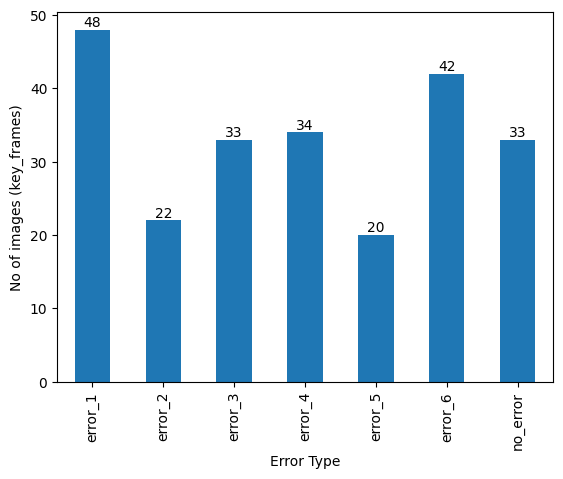

In [32]:
ax = df[['error_1', 'error_2', 'error_3', 'error_4', 'error_5', 'error_6', 'no_error']].sum().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
ax.set_xlabel('Error Type')
ax.set_ylabel('No of images (key_frames)')

# clever train test split

In [ ]:
# create a train and test split that maintains the same distribution of errors

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df[error_columns])

,patient_name,fp_1,fp_2,fp_3,ff_1,ff_2,ff_3
0,MAD_178_0,1,0,1,0,0,1
1,MAD_149_0,0,1,0,1,1,0
2,MAD_31_0,0,0,0,0,0,0
3,MAD_176_0,0,0,0,0,0,0
4,MAD_182_0,0,1,0,1,0,0
...,...,...,...,...,...,...,...
63,MAD_161_0,0,1,1,1,0,1
64,MAD_19_0,0,0,1,1,0,1
65,MAD_75_0,0,0,0,0,0,1
66,MAD_132_0,0,0,0,0,0,0


Text(0, 0.5, 'No of images (key_frames)')

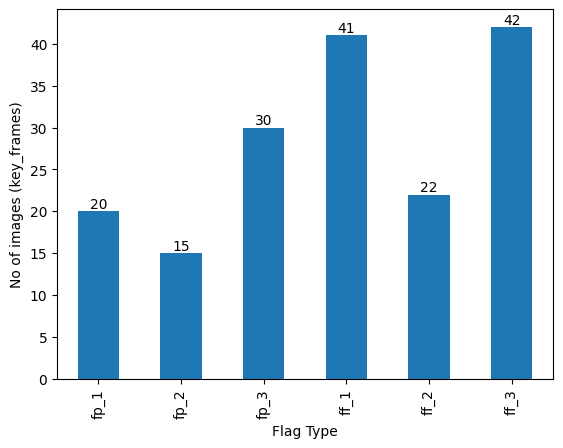

In [2]:

import pandas as pd

annotation_file = "new_annotations"
df = pd.read_json(annotation_file)
df = df[["patient_name", "flags"]]

# Initialize an empty DataFrame with the desired columns
result_df = pd.DataFrame(columns=['patient_name', 'fp_1', 'fp_2', 'fp_3', 'ff_1', 'ff_2', 'ff_3'])

# Iterate through each row of the original DataFrame
for index, row in df.iterrows():
    # Initialize a dictionary to store the counts for each flag
    flag_counts = {'fp_1': 0, 'fp_2': 0, 'fp_3': 0, 'ff_1': 0, 'ff_2': 0, 'ff_3': 0}

    # Iterate through each flag in the 'flags' column
    for flag in row['flags']:
        # Check if the flag is 'no_error'
        if flag == 'no_error':
            flag_counts = {'fp_1': 0, 'fp_2': 0, 'fp_3': 0, 'ff_1': 0, 'ff_2': 0, 'ff_3': 0}
        else:
            # Extract the prefix and number from the flag
            parts = flag.split('_')
            prefix = parts[0]
            numbers = parts[-1]
            digits = [int(digit) for digit in numbers]

            # Update the counts in the dictionary based on the prefix and number
            if prefix == 'fp':
                for num in numbers:
                    flag_counts[f'fp_{num}'] = 1
            elif prefix == 'ff':
                for num in numbers:
                    flag_counts[f'ff_{num}'] = 1

    # Convert the flag_counts dictionary to a DataFrame
    flag_counts_df = pd.DataFrame([flag_counts])

    # Concatenate the patient_name column from the original DataFrame
    flag_counts_df['patient_name'] = row['patient_name']

    # Reorder columns for better readability
    flag_counts_df = flag_counts_df[['patient_name', 'fp_1', 'fp_2', 'fp_3', 'ff_1', 'ff_2', 'ff_3']]

    # Append the flag counts DataFrame as a new row to the result DataFrame
    result_df = pd.concat([result_df, flag_counts_df], ignore_index=True)

# Print the resulting DataFrame
display(result_df)

# Print the resulting DataFrame
# print(result_df)
# result_df.to_csv("data_new.csv",index=False)

ax = result_df[['fp_1', 'fp_2', 'fp_3', 'ff_1', 'ff_2', 'ff_3']].sum().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
ax.set_xlabel('Flag Type')
ax.set_ylabel('No of images (key_frames)')


In [8]:
import pandas as pd


target_patients = ["MAD_178_0", "MAD_149_0", "MAD_31_0"]  

# Inizializza una lista per i risultati
results = []

# # Itera attraverso i pazienti target
# for target_patient in target_patients:
def get_errors_patient(target_patient):
    # Filtra il DataFrame per il paziente target
    file_path = "/Users/giuliamonopoli/Desktop/PhD /deepvalve/data/data_new.csv"
    result_df = pd.read_csv(file_path)
    patient_df = result_df[result_df['patient_name'] == target_patient]

    # Inizializza liste per le colonne "ff" e "fp" non nulle
    flags  =[]

    # Itera attraverso le colonne del DataFrame
    for column in patient_df.columns:
        if column.startswith('ff') and patient_df[column].any():
            flags.append(column)
        elif column.startswith('fp') and patient_df[column].any():
            flags.append(column)
        
    if not flags:
        flags.append("no_error")
    # Aggiungi i risultati alla lista
    return flags
def encoded_flag(patient):
    file_path = "/Users/giuliamonopoli/Desktop/PhD /deepvalve/data/data_new.csv"
    result_df = pd.read_csv(file_path)
    patient_df = result_df[result_df['patient_name'] == patient]
    flags  =    patient_df[['fp_1', 'fp_2', 'fp_3', 'ff_1', 'ff_2', 'ff_3']].values.tolist()
    return flags[0]
# get_errors_patient("MAD_103_0")
encoded_flag("MAD_103_0")

[0, 0, 0, 0, 0, 0]
